In [1]:
# 범주형 자료의 수량화 =====================================================
x=[{'city':'seoul','temp':10.0}, {'city':'Dubai', 'temp':33.5}, {'city':'LA','temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)
vec.fit_transform(x) # X를 범주형 수량화 자료로 변환

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [3]:
vec1=DictVectorizer(sparse=True) # 메모리를 줄이기 위해 sparse=True
x1=vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [4]:
x1.toarray() # sparse=True를 풀고 배열로 변경
vec1.get_feature_names() 

['city=Dubai', 'city=LA', 'city=seoul', 'temp']

In [6]:
# 텍스트 자료의 수량화 =====================================================
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer()# default는 sparse=True
t=vec2.fit_transform(text).toarray() # sparse=True를 풀고 text를 수량화 배열 자료로 변환
import pandas as pd
t1=pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x2=tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3=pd.DataFrame(x2,columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


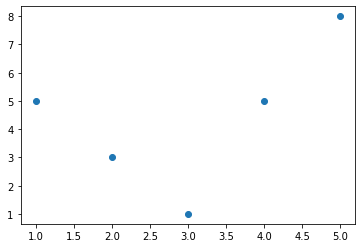

In [9]:
# Polynomial 특성변수 생성 =====================================================
import matplotlib.pyplot as plt
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([5,3,1,5,8])
plt.plot(x,y,'o') # 선형회귀를 하기에는 부적합

In [10]:
from sklearn.preprocessing import PolynomialFeatures
fg=PolynomialFeatures(degree=3, include_bias=True) # include_bias는 절편항 여부
x1=fg.fit_transform(x[:,np.newaxis]) # 3차까지 생성
print(x1)

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


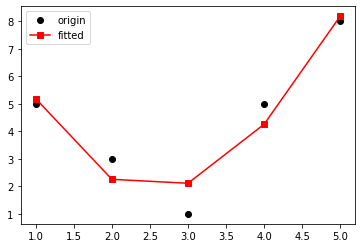

In [11]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x1,y) 
yfit=reg.predict(x1) # 적합값 
plt.plot(x,y,'ko',label='origin') # ko는 검은색 동그라미
plt.plot(x,yfit,'rs-',label='fitted') # rs-는 빨간색 네모를 줄로 잇기
plt.legend(loc='best') # 범주를 제일 적절한 곳으로

In [10]:
# 결측자료 대체 ===================================================== 
x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [11]:
from sklearn.preprocessing import Imputer
im=Imputer(strategy='mean') 
im.fit_transform(x_miss) # 열의 평균값으로 대체

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.        ,  2.        ,  3.        , 12.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 6.33333333, 10.        , 11.        , 12.        ],
       [13.        ,  6.        , 15.        , 16.        ]])

In [14]:
# 특성변수 생성(교호작용까지)과 결측자료 대체까지 한번에 해주려면 pipeline 이용.
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
y=pd.Series([2,5,1,6])
model = make_pipeline(Imputer(strategy='mean'),PolynomialFeatures(degree=2),LinearRegression())
model.fit(x_miss,y)
model.predict(x_miss) # 이 자료에서는 관측치는 4개, 특성변수 14개로 완전적합됨. 

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([2., 5., 1., 6.])

In [12]:
#www.kaggle.com 으로 들어간 후 새로운 account를 생성하고 
#www.kaggle.com/c/rossmann-store-sales/data 에서 자료를 다운받는다. 
#zip을 풀어서 적절한 폴더(이경우 머신러닝교재)
import pandas as pd
df1=pd.read_csv("C:/Users/yspark/Desktop/머신러닝교재/rossmann-stores-sales/train.csv",engine='python')
print(df1.shape)
type(df1)

(1017209, 9)


pandas.core.frame.DataFrame

In [3]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
df2=pd.read_csv("C:/Users/yspark/Desktop/머신러닝교재/rossmann-stores-sales/store.csv",engine='python')
df2.shape

(1115, 10)

In [20]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
df=pd.merge(df1,df2,on='Store')
df.shape

(1017209, 18)

In [15]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [16]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())

1115
942
5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64


In [17]:
import numpy as np
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df['Month']=df['Date'].dt.month
df['Quarter']=df['Date'].dt.quarter
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.week
df['Season']=np.where(df['Month'].isin([3,4,5]),'Spring',
                     np.where(df['Month'].isin([6,7,8]),'Summer',
                             np.where(df['Month'].isin([9,10,11]),'fall',
                                     np.where(df['Month'].isin([12,1,2]),'winter','None'))))
print(df[['Date','Year','Month','Day','Week','Quarter','Season']].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2D4C8B6D8>,
      dtype=object)

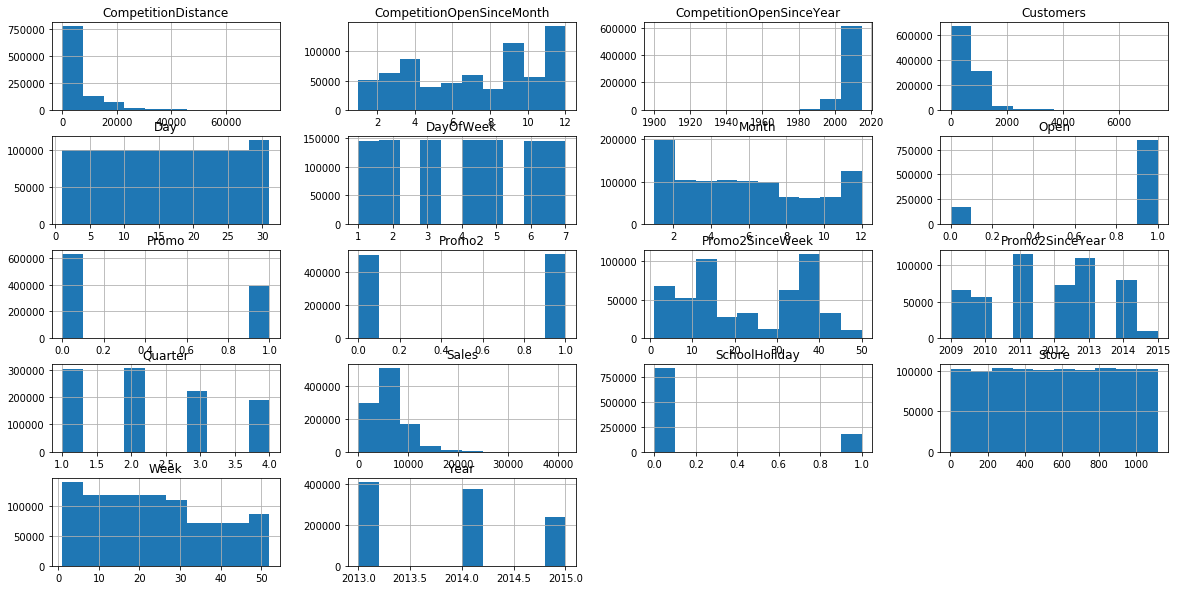

In [18]:
df.hist(figsize=(20,10))

In [28]:
df.isnull().sum()/df.shape[0]*100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [19]:
df['CompetitionDistance']=df['CompetitionDistance'].fillna(df['CompetitionDistance'].mode()[0])
df['CompetitionDistance'].isnull().sum()
#df['CompetitionDistance'].head()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
n_columns=['Customers','Open','Promo','Promo2','StateHoliday','SchoolHoliday','CompetitionDistance']
categ_columns=['DayOfWeek','Quarter','Month','Year','StoreType','Assortment','Season']

In [ ]:
def dummy(data,col):
   lab=LabelEncoder() #0~c-1로 클래스 부여
   aa=lab.fit_transform(data[col]).reshape(-1,1)
   ohe=OneHotEncoder(sparse=False)
   column_names=[col+'_'+ str(i) for i in lab.classes_]
   return(pd.DataFrame(ohe.fit_transform(aa),columns=column_names))

In [ ]:
fdata=df[n_columns]
for column in categ_columns:
    temp_df=dummy(df,column)
    fdata=pd.concat([fdata,temp_df],axis=1)
fdata.head()

In [ ]:
fdata.shape

In [ ]:
fdata.dtypes.unique()

In [ ]:
fdata['StateHoliday'].unique()

In [ ]:
fdata['StateHoliday']=np.where(fdata['StateHoliday']=='o',0,1)

In [1]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=10, 
                           n_clusters_per_class=1, n_samples=2000, random_state=10)
print('Original dataset shape %s' % Counter(y))  

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Original dataset shape Counter({2: 1795, 1: 141, 0: 64})


In [2]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 1795, 1: 1795, 0: 1795})


In [3]:
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({1: 1805, 2: 1795, 0: 1795})
